In [2]:
import PIL as pil
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import pathlib
import tensorflow_hub as hub

In [3]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

In [4]:
data_dir = pathlib.Path(r'C:\Users\chhip\Desktop\deep learning\Cnn\datasets\flower_photos')
data_dir

WindowsPath('C:/Users/chhip/Desktop/deep learning/Cnn/datasets/flower_photos')

In [5]:
list(data_dir.glob('./*'))

[WindowsPath('C:/Users/chhip/Desktop/deep learning/Cnn/datasets/flower_photos/daisy'),
 WindowsPath('C:/Users/chhip/Desktop/deep learning/Cnn/datasets/flower_photos/dandelion'),
 WindowsPath('C:/Users/chhip/Desktop/deep learning/Cnn/datasets/flower_photos/LICENSE.txt'),
 WindowsPath('C:/Users/chhip/Desktop/deep learning/Cnn/datasets/flower_photos/roses'),
 WindowsPath('C:/Users/chhip/Desktop/deep learning/Cnn/datasets/flower_photos/sunflowers'),
 WindowsPath('C:/Users/chhip/Desktop/deep learning/Cnn/datasets/flower_photos/tulips')]

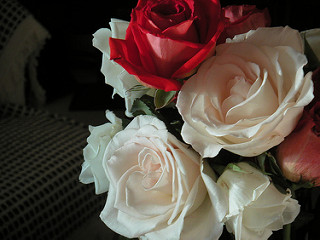

In [6]:
list(data_dir.glob('roses/*'))
pil.Image.open(list(data_dir.glob('roses/*'))[1])

In [7]:
flower_dir= {'daisy':list(data_dir.glob('daisy/*')),
               'dandelion':list(data_dir.glob('dandelion/*')),
                'roses':list(data_dir.glob('roses/*')),
                'tulips':list(data_dir.glob('tulips/*')),
                'sunflowers':list(data_dir.glob('sunflowers/*'))}

flower_labels= {'daisy':0,
               'dandelion':1,
                'roses':2,
                'tulips':3,
                'sunflowers':4}

In [8]:
X = []
y = []
for flowr_name, images in flower_dir.items():
    for image in images:
        img = cv2.imread(str(image))
        re_img = cv2.resize(img, (224,224))
        X.append(re_img)
        y.append(flower_labels[flowr_name])

In [9]:
X = np.array(X)
y = np.array(y)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print([len(i) for i in [X_train, X_test, y_train, y_test]])

[2752, 918, 2752, 918]


In [11]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [12]:

model = tf.keras.Sequential([
    
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", input_shape = (224,224,3),
                   trainable=False),
    
    layers.Dense(5, activation = 'softmax')
    
])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [13]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 15s 67ms/step - loss: 1.2763 - acc: 0.5058
Epoch 2/5
86/86 [==============================] - 6s 64ms/step - loss: 0.4659 - acc: 0.8373
Epoch 3/5
86/86 [==============================] - 6s 64ms/step - loss: 0.3384 - acc: 0.8915
Epoch 4/5
86/86 [==============================] - 6s 64ms/step - loss: 0.2799 - acc: 0.9128
Epoch 5/5
86/86 [==============================] - 5s 64ms/step - loss: 0.2366 - acc: 0.9299


In [14]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 3s 85ms/step - loss: 0.3685 - acc: 0.8660


[0.36845025420188904, 0.8660130500793457]

In [15]:
y_pred = model.predict(X_test_scaled)

In [16]:
def get_key(value):
    for key, val in flower_labels.items():
        if val== value:
            return key
            
            
def predict(index):
    plt.imshow(X_test[index])
    pred = get_key(np.argmax(y_pred[index]))
    truth = get_key(y_test[index])
    if truth != pred:
        
        return ['prediction is not correct', pred, truth, index]
        
    return [pred, truth]
    

[['dandelion', 'dandelion'],
 ['daisy', 'daisy'],
 ['roses', 'roses'],
 ['sunflowers', 'sunflowers'],
 ['roses', 'roses'],
 ['tulips', 'tulips'],
 ['daisy', 'daisy'],
 ['sunflowers', 'sunflowers'],
 ['prediction is not correct', 'roses', 'tulips', 8],
 ['sunflowers', 'sunflowers'],
 ['dandelion', 'dandelion'],
 ['tulips', 'tulips'],
 ['dandelion', 'dandelion'],
 ['prediction is not correct', 'roses', 'tulips', 13],
 ['tulips', 'tulips'],
 ['dandelion', 'dandelion'],
 ['dandelion', 'dandelion'],
 ['dandelion', 'dandelion'],
 ['daisy', 'daisy'],
 ['roses', 'roses'],
 ['prediction is not correct', 'tulips', 'roses', 20],
 ['roses', 'roses'],
 ['dandelion', 'dandelion'],
 ['roses', 'roses'],
 ['prediction is not correct', 'roses', 'tulips', 24],
 ['daisy', 'daisy'],
 ['dandelion', 'dandelion'],
 ['sunflowers', 'sunflowers'],
 ['sunflowers', 'sunflowers'],
 ['prediction is not correct', 'sunflowers', 'daisy', 29],
 ['sunflowers', 'sunflowers'],
 ['roses', 'roses'],
 ['roses', 'roses'],
 ['t

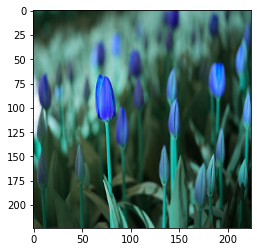

In [17]:
[predict(i) for i in range(100)]

['sunflowers', 'sunflowers']

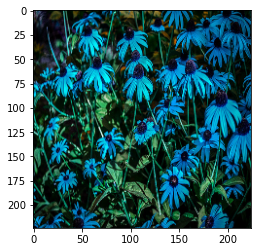

In [18]:
predict(38)

In [19]:
from skimage import transform
def load(filename):
    image = pil.Image.open(filename)
    image = np.array(image).astype('float32')/255
    image = transform.resize(image, (224, 224, 3))
    image = np.expand_dims(image, axis=0)
    return image

image = load('flr4.jpg')
prediction = get_key(np.argmax(model.predict(image)))
prediction

'roses'